In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import *
from sklearn.manifold import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
sns.set()

In [2]:
data = load_digits()

In [3]:
print('*** Feature names is:\n', data.feature_names)
print('*** Traget names is:\n', data.target_names)
print('*** Data is:\n', data.data)
print('*** Data shape is:\n', data.data.shape)

*** Feature names is:
 ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
*** Traget names is:
 [0 1 2 3 4 5 6 7 8 9]
*** Data is:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9

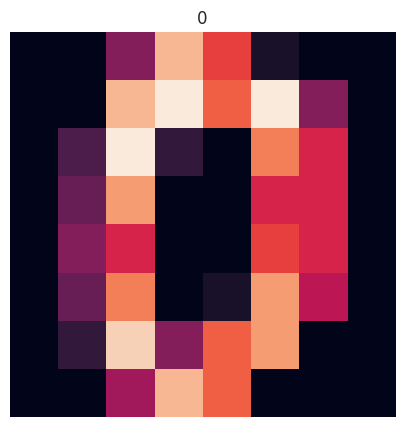

In [4]:
plt.figure(figsize = (7, 5))
plt.imshow(data.images[0])
plt.title(data.target[0])
plt.axis('off')
plt.show()

In [5]:
print(data.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [6]:
pca = PCA(n_components = 2)

In [7]:
tr = pca.fit_transform(data.data)

In [8]:
tr.shape

(1797, 2)

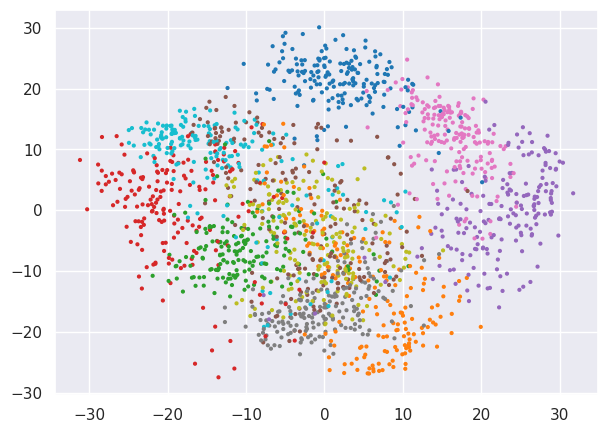

In [9]:
plt.figure(figsize = (7, 5))
plt.scatter(tr[:, 0], tr[:, 1], c = data.target, cmap = 'tab10', s = 4)
plt.show()

In [10]:
def visualize_dim_red(name, alg, data):
    al = alg(n_components = 2)
    tr = al.fit_transform(data.data)
    plt.figure(figsize = (7, 5))
    plt.scatter(tr[:, 0], tr[:, 1], c = data.target, cmap = 'tab10', s = 4)
    plt.title(name, fontsize = 15)
    plt.show()

In [11]:
dim_red_algs = {'PCA': PCA, 'KernelPCA': KernelPCA, 'SparsePCA': SparsePCA, 'MiniBatchSparsePCA': MiniBatchSparsePCA, 'FastICA': FastICA, 
        'LatentDirichletAllocation': LatentDirichletAllocation, 'tSNE': TSNE, 'MDS': MDS}

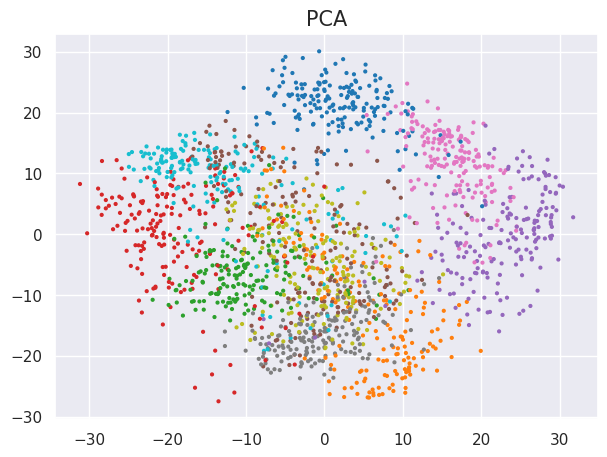

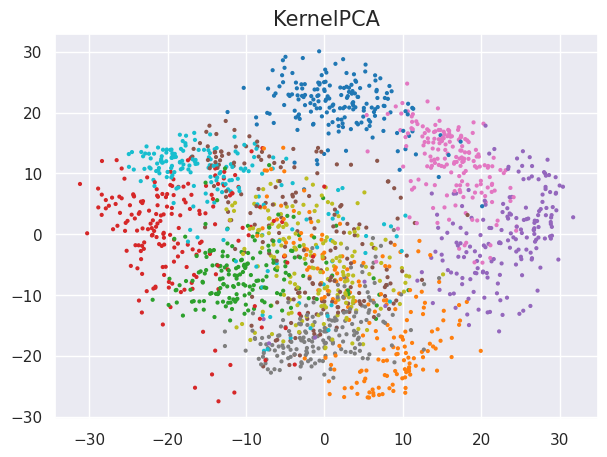

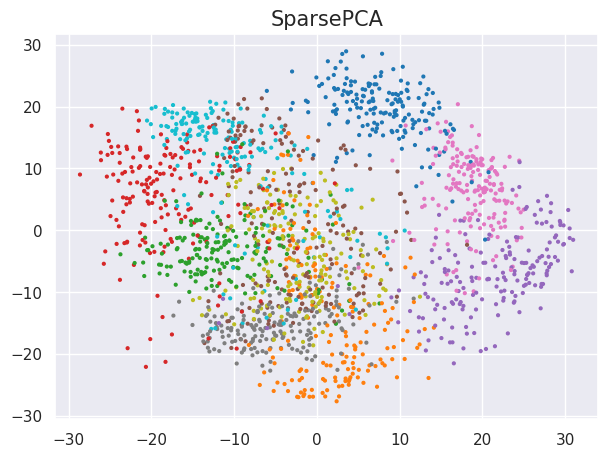

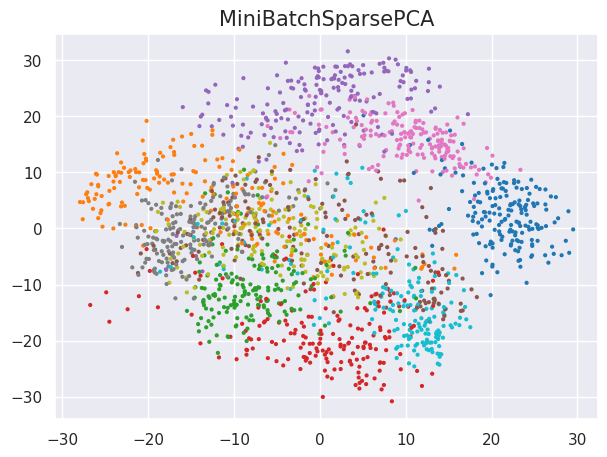

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


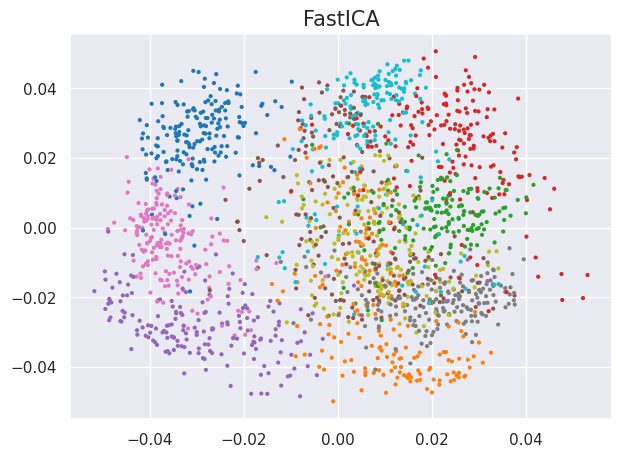

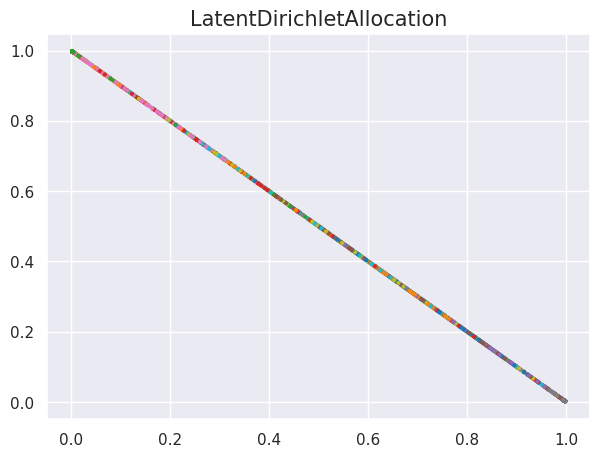

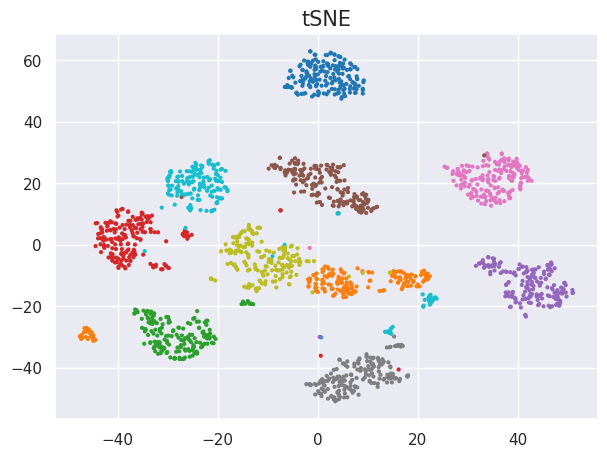

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


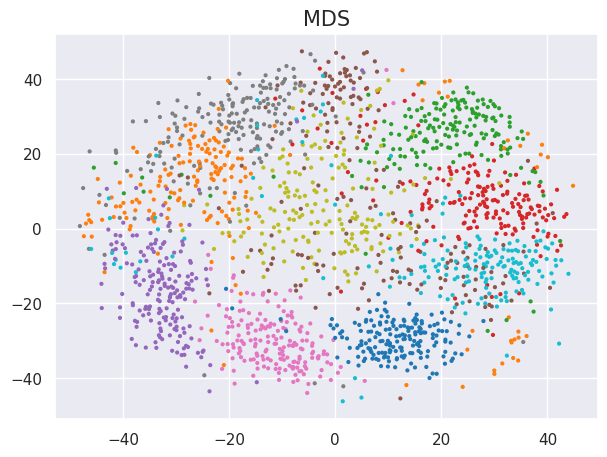

In [12]:
for name, alg in dim_red_algs.items():
    visualize_dim_red(name, alg, data)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = .2)

In [19]:
print('*** Train set size is:', X_train.shape)
print('*** Test set size is:', X_test.shape)

*** Train set size is: (1437, 64)
*** Test set size is: (360, 64)


In [20]:
cls_algs = {'SVC': SVC, 'RandomForestClassifier': RandomForestClassifier, 'AdaBoostClassifier': AdaBoostClassifier}

In [21]:
alg = RandomForestClassifier()
alg.fit(X_train, y_train)
y_pred = alg.predict(X_test)

In [22]:
y_pred

array([4, 6, 4, 7, 3, 1, 3, 1, 3, 1, 9, 3, 6, 8, 9, 4, 2, 1, 1, 0, 5, 7,
       6, 5, 1, 8, 3, 9, 5, 6, 5, 2, 8, 5, 0, 1, 3, 4, 7, 1, 9, 8, 5, 1,
       3, 5, 1, 9, 8, 2, 1, 5, 8, 0, 7, 5, 4, 7, 6, 2, 4, 7, 9, 7, 9, 3,
       9, 3, 4, 2, 4, 5, 6, 1, 2, 9, 9, 5, 3, 9, 0, 9, 7, 7, 3, 4, 5, 1,
       5, 0, 1, 3, 3, 1, 2, 7, 7, 7, 7, 9, 3, 5, 7, 7, 0, 1, 2, 6, 5, 5,
       5, 9, 9, 8, 6, 5, 9, 5, 5, 7, 4, 1, 5, 2, 1, 3, 1, 0, 1, 5, 4, 2,
       1, 7, 8, 7, 1, 7, 1, 2, 5, 4, 2, 4, 9, 9, 4, 2, 3, 8, 9, 6, 6, 7,
       6, 1, 5, 1, 3, 4, 7, 4, 2, 8, 9, 6, 0, 2, 4, 3, 6, 4, 5, 1, 5, 5,
       2, 2, 6, 2, 2, 3, 4, 0, 3, 3, 9, 3, 9, 2, 5, 9, 4, 1, 4, 8, 8, 3,
       2, 1, 1, 6, 0, 0, 7, 1, 6, 8, 0, 5, 0, 1, 3, 8, 7, 4, 3, 9, 1, 4,
       0, 0, 6, 3, 2, 2, 3, 7, 6, 1, 2, 3, 1, 9, 7, 2, 2, 5, 6, 1, 6, 3,
       3, 3, 5, 1, 7, 8, 0, 0, 1, 8, 8, 1, 4, 2, 5, 5, 5, 9, 8, 7, 5, 5,
       1, 0, 9, 4, 1, 2, 1, 9, 3, 8, 0, 7, 3, 6, 9, 8, 5, 0, 1, 5, 0, 4,
       3, 6, 9, 6, 8, 7, 6, 3, 7, 8, 8, 7, 0, 6, 5,

In [34]:
def training_test_process(name, alg, X_train, y_train, X_test, y_test):
    al = alg()
    al.fit(X_train, y_train)
    pred = al.predict(X_test)
    print(name)
    ConfusionMatrixDisplay.from_estimator(al, X_test, y_test)
    plt.axis('off')

SVC
RandomForestClassifier
AdaBoostClassifier


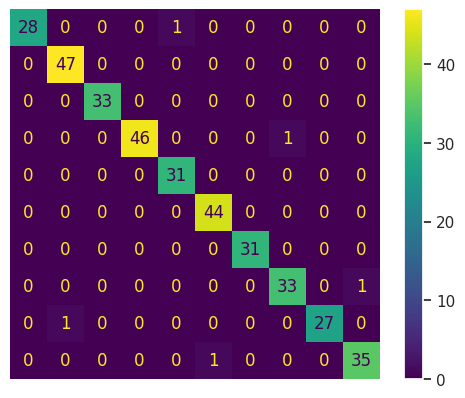

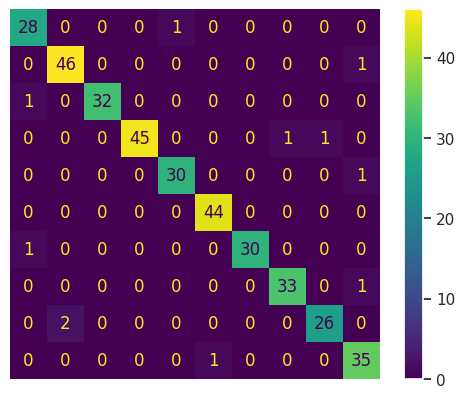

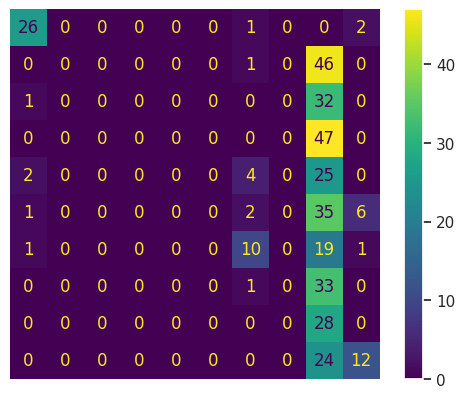

In [35]:
for name, alg in cls_algs.items():
    training_test_process(name, alg, X_train, y_train, X_test, y_test)